In [1]:
from src import full_evaluation_flow, read_yfinance_crypto_data, pre_process_ewt_data, prepare_data
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

/root/cryptobot-enviroment/.venv/lib/python3.12/site-packages/numpy/_core/getlimits.py:545: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
2025-01-08 03:08:53.657852: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-08 03:08:53.664023: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-08 03:08:53.679571: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736316533.703365   10749 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plu

In [9]:
seq_len = 90
tested_model = "ata-p90-1f-2L.keras"
model = tf.keras.models.load_model(f"./saved_models/{tested_model}")



In [10]:
# Fetch Ripple price data
df = read_yfinance_crypto_data("ata-usd", "max", "1d")
scaler = MinMaxScaler()

[
    [_, _, _],
    [test_date_series, test_data, normalized_test_data]
] = pre_process_ewt_data(df, scaler)


test_target = test_data
print(f"Test Target: {test_data.shape}\nTest Data: {test_target.shape}")

Cutoff:  393
Cutoff:  393
Cutoff:  393
Test Target: (393, 1)
Test Data: (393, 1)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


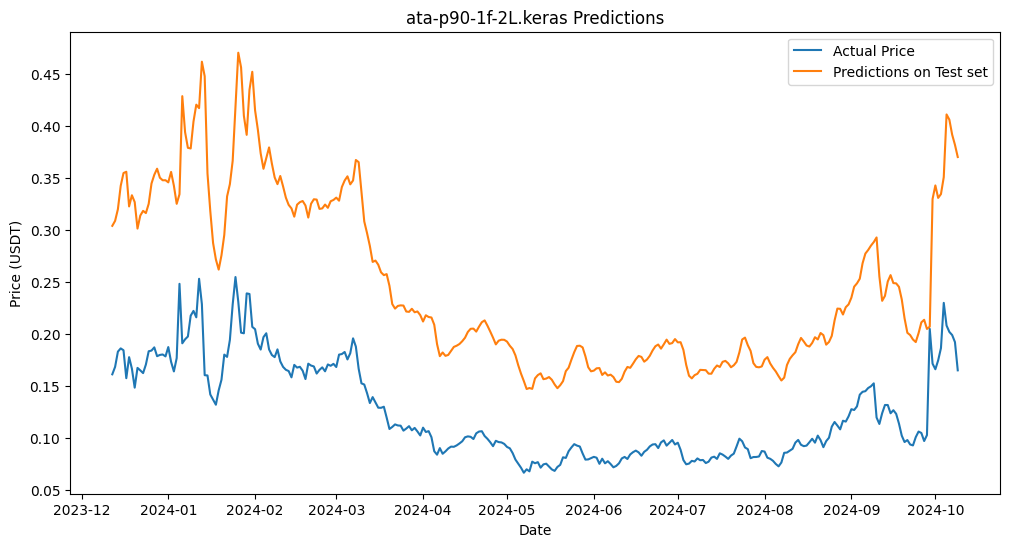

Model: ata-p90-1f-2L.keras
RMSE: 0.1289
MAE: 0.1224
MAPE: 101.3375
R2 Score: -6.8724


{'RMSE': np.float64(0.1289192622292845),
 'MAE': 0.12241171593024786,
 'MAPE': np.float64(101.33747109483278),
 'R2': -6.872404760300582}

In [11]:
full_evaluation_flow(
    model,
    prepare_data,
    normalized_test_data,
    test_data,
    test_date_series,
    seq_len,
    tested_model
)